In [ ]:
# Notebook para expermintar con la remoción de píxeles calientes y muertos en umágenes de electroluminiscecnicia

In [1]:
# Importar librerías
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ImagePreprocessing.utils import *
from ImagePreprocessing.contrast_enhancement import *
import	cv2 as cv

C:\Users\Compustore\AppData\Local\Temp\ipykernel_18704\3026100420.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [16]:
images_path = read_folder_path(
    r"D:\Documentos\Universidad de Cuenca\Trabajo de Titulación\Datasets_EL\Policristalino\Poli_Sup_V44.5_I9.16_t30\Poli_Sup_V40_I4.5_t28\Poli_Sup_V40_I4.5_t28_NoBG_CLAHE_mean_max_min")

# Leer imágenes
dataset = read_images(images_path)
print("Número de imágenes: ", len(dataset))

Número de imágenes:  5


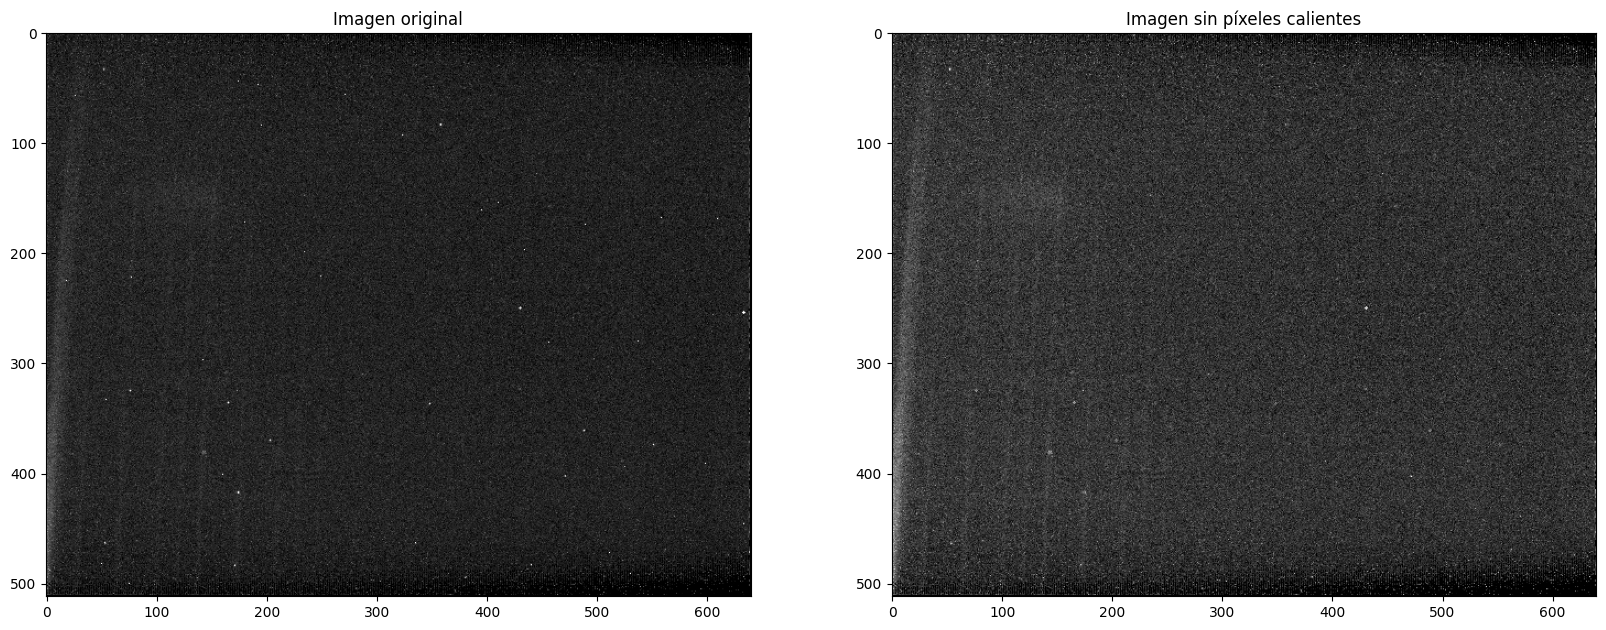

In [22]:
# Aplicación del algorithm de remoción de píxeles calientes
image_no_hot_pixels = remove_hot_pixels(dataset[4])

# Visualización de la imagen original y la imagen sin píxeles calientes
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(dataset[4], cmap='gray')
plt.title('Imagen original')
plt.subplot(1, 2, 2)
plt.imshow(image_no_hot_pixels, cmap='gray')
plt.title('Imagen sin píxeles calientes')
plt.show()


In [13]:
def medianThreshold(img, threshold=0.1, size=3, condition='>', copy=True):
    '''
    set every the pixel value of the given [img] to the median filtered one
    of a given kernel [size]
    in case the relative [threshold] is exeeded
    condition = '>' OR '<'
    '''
    from scipy.ndimage import median_filter

    indices = None
    if threshold > 0:
        blur = np.asfarray(median_filter(img, size=size))
        with np.errstate(divide='ignore', invalid='ignore', over='ignore'):

            if condition == '>':
                indices = abs((img - blur) / blur) > threshold
            else:
                indices = abs((img - blur) / blur) < threshold

        if copy:
            img = img.copy()

        img[indices] = blur[indices]
    return img, indices

def _correctArtefacts(image, threshold):
        '''
        Apply a thresholded median replacing high gradients 
        and values beyond the boundaries
        '''
        image = np.nan_to_num(image)
        medianThreshold(image, threshold, copy=False)
        return image

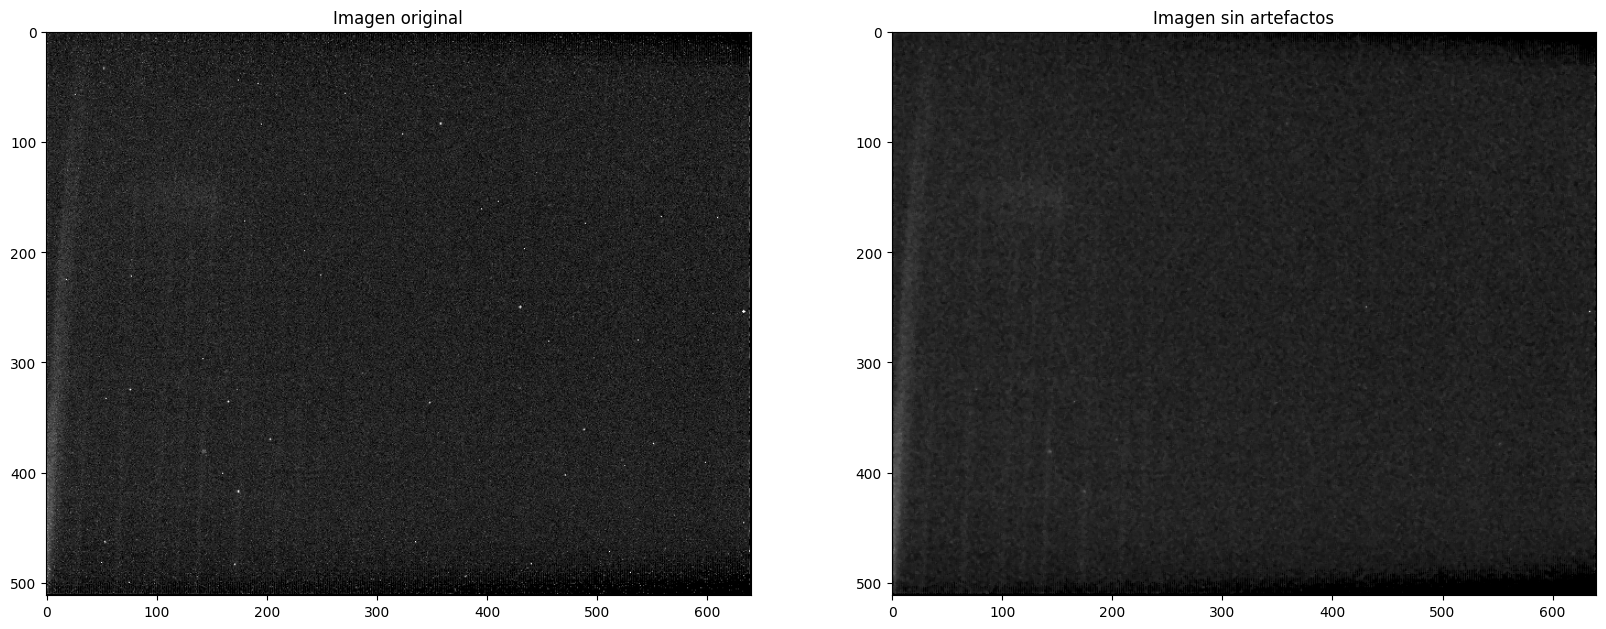

In [23]:
image_edited = _correctArtefacts(dataset[4], 0.1)

# Visualización de la imagen original y la imagen sin píxeles calientes
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(dataset[4], cmap='gray')
plt.title('Imagen original')
plt.subplot(1, 2, 2)
plt.imshow(image_edited, cmap='gray')
plt.title('Imagen sin artefactos')
plt.show()